# CONTENTS:

1. Load libraries and import data.
2. Check and clean data.
3. Split the data and run the K-Nearest Neigbour Model (KNN).

## 1. Load libraries and import data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier

In [2]:
# Define path for where data is stored
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Data Sets'

In [3]:
# Read in the Answers data.
answers = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. Check and clean the data.

In [4]:
print(answers.columns) # I can see that the ones missing information are Gdansk, Roma and Tours. These have to be dropped from the unscaled file.

Index(['DATE', 'BASEL_pleasant_weather', 'BELGRADE_pleasant_weather',
       'BUDAPEST_pleasant_weather', 'DEBILT_pleasant_weather',
       'DUSSELDORF_pleasant_weather', 'HEATHROW_pleasant_weather',
       'KASSEL_pleasant_weather', 'LJUBLJANA_pleasant_weather',
       'MAASTRICHT_pleasant_weather', 'MADRID_pleasant_weather',
       'MUNCHENB_pleasant_weather', 'OSLO_pleasant_weather',
       'SONNBLICK_pleasant_weather', 'STOCKHOLM_pleasant_weather',
       'VALENTIA_pleasant_weather'],
      dtype='object')


In [5]:
# Read the unscaled data (which I want to use in this exercise).
data_unscaled = pd.read_csv(os.path.join(path, 'Dataset-weather-prediction-dataset-processed.csv'))


In [6]:
data_unscaled.head(3)

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9


In [7]:
# List column names
print(data_unscaled.columns.tolist())

['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_pr

In [8]:
# Print nr of columns to compare with after drdop
num_columns = data_unscaled.shape[1]
print(num_columns)

170


In [9]:
# Drop Gdansk, Roma and Tours since they are missing from the Answers file. I use a filtering function. 

# List of city names
cities = ['GDANSK', 'ROMA', 'TOURS']

# Find columns that include any of the city names
cols_to_drop = [col for col in data_unscaled.columns if any(city in col for city in cities)]

# Drop those columns
dataun_clean = data_unscaled.drop(columns=cols_to_drop)

# Count nr of columns in dataun_clean
num_columns = dataun_clean.shape[1]
print(num_columns)

149


In [10]:
## Create a subset by dropping date and month
x = dataun_clean.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [11]:
print(x.shape)
print(y.shape)

(22950, 147)
(22950, 15)


In [12]:
# Count nr of columns
num_columns = dataun_clean.shape[1]
print(num_columns)

# Count nr of columns
num_columns = answers.shape[1]
print(num_columns)

149
16


## 3. Split data and run the K-Nearest Neigbour Model (KNN)
In this step the data is classified into pleasant and unpleasant weather. By looking at the nearest neigbour (data point) the model classifies based on majority vote (classification) or average (regression) if the data point represents pleasant or unpleasant weather.

In [13]:
## Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 147)
(5738, 147)
(17212, 15)
(5738, 15)


In [15]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    ####classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE ????? What does this line mean???
    ## Fit the model on the training data.
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    train_acc[i] = knn.score(x_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(x_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

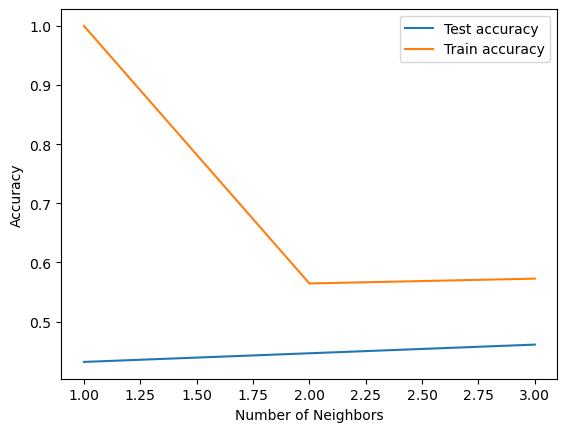

In [16]:
### plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [17]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    train_acc[i] = knn.score(x_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(x_test, np.array(y_test)) #CHANGE THIS LINE


i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


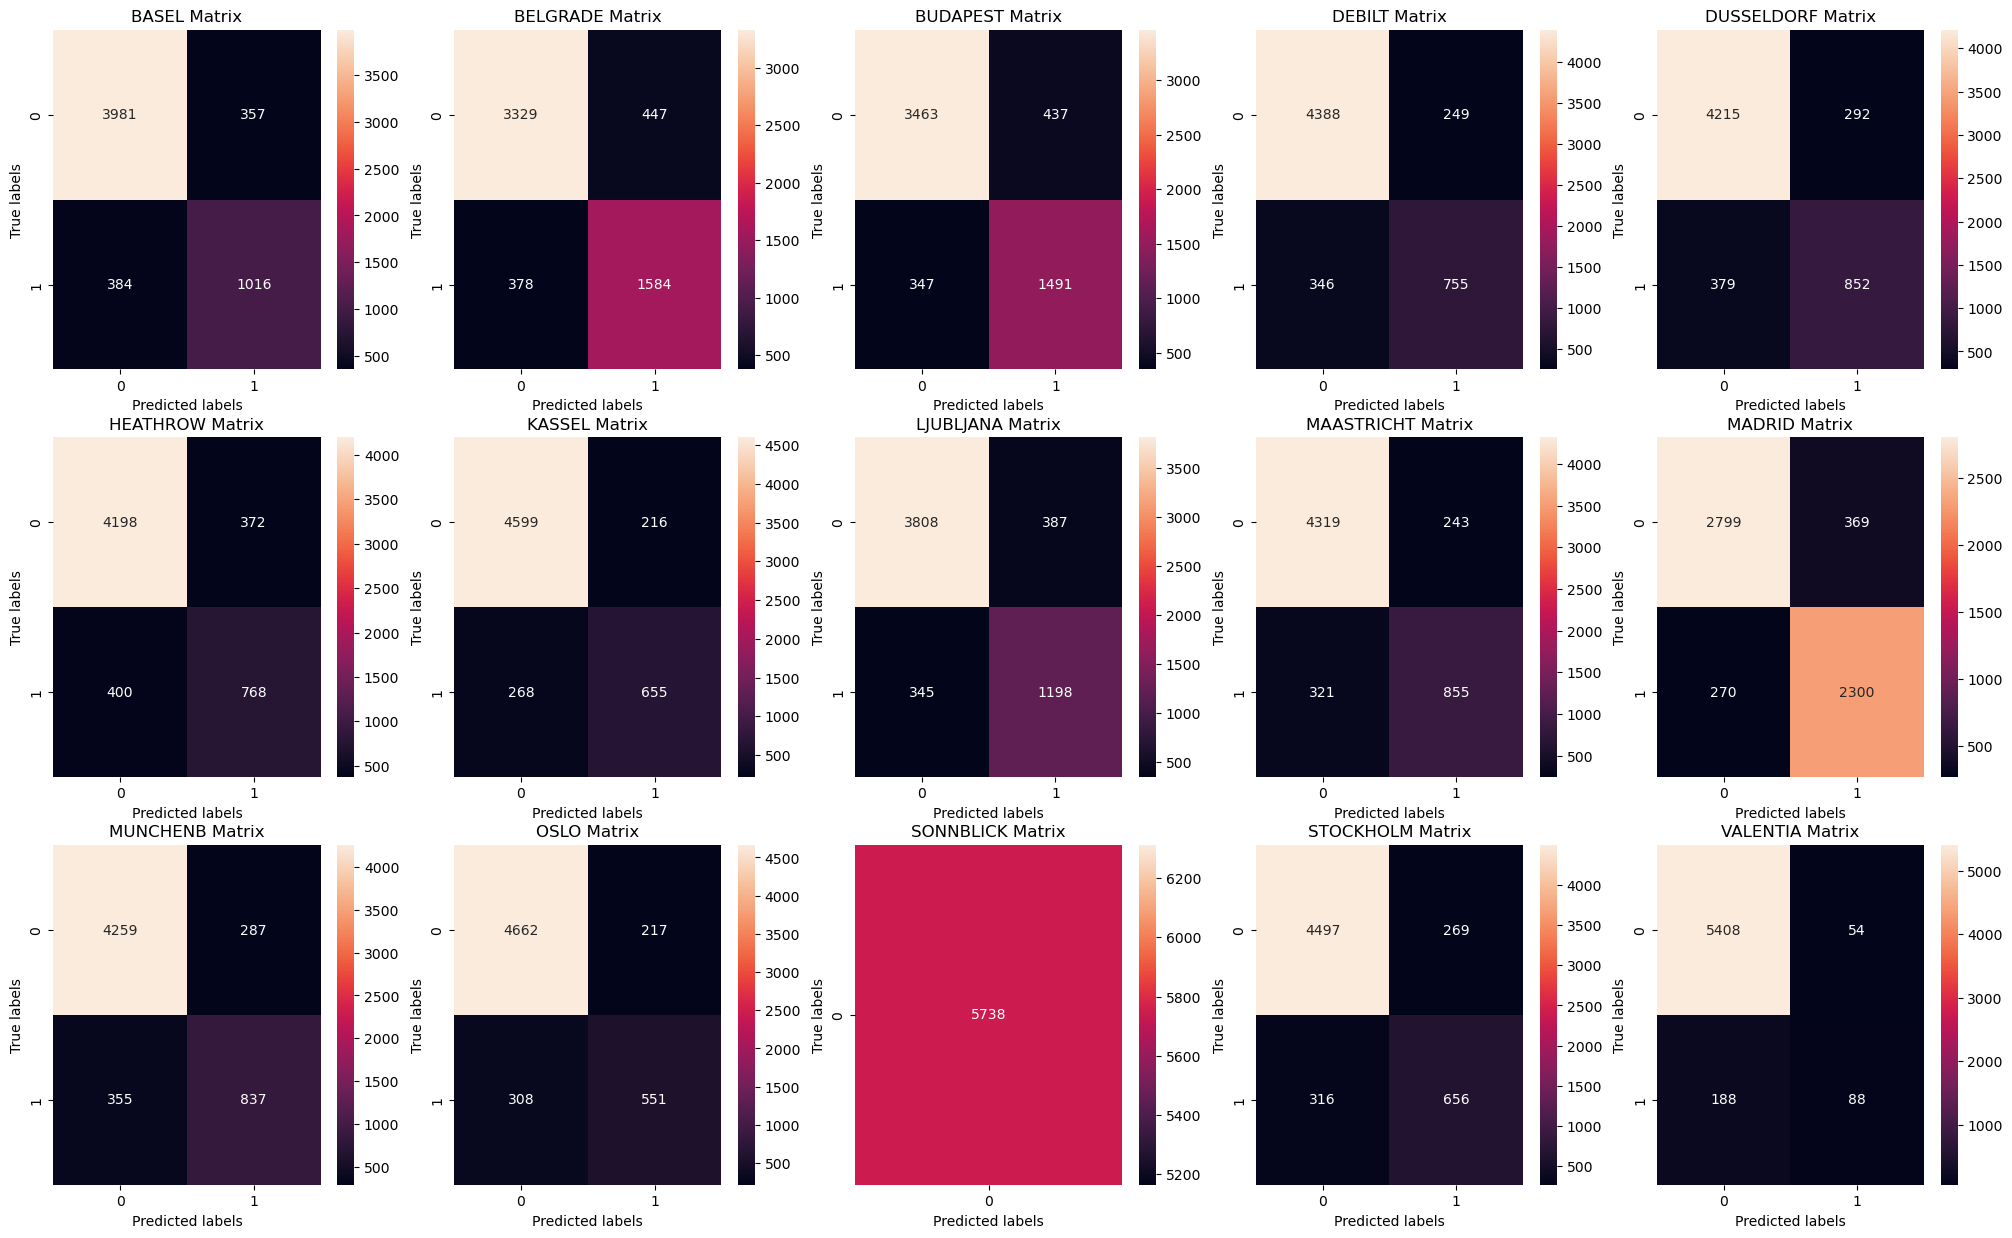

In [18]:
locations = list({x.split("_")[0] for x in dataun_clean.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        #ax[i,j].xaxis.set_ticklabels(labels); #These two lines may throw an error depending on SONNBLICK data. Can you tell why?
        #ax[i,j].yaxis.set_ticklabels(labels);
        count+=1

In [19]:
# 3. Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 4. Initialize and train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# 5. Make predictions on the test set
y_pred = knn.predict(x_test)

# 6. Calculate test accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.48


In [20]:
# 4. Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# 5. Predict on training data
y_train_pred = knn.predict(x_train)

# 6. Predict on test data
y_test_pred = knn.predict(x_test)

# 7. Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# 8. Print results
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy:     {test_accuracy:.2f}")

Training Accuracy: 0.53
Test Accuracy:     0.48
